In [1]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving pat.jpg to pat.jpg
Saving spon.jpg to spon.jpg


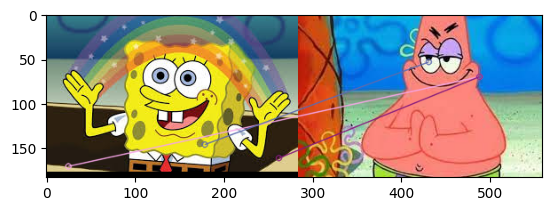

(<matplotlib.image.AxesImage at 0x7fe99f6b0040>, None)

In [3]:
# Contoh Script untuk feature detection and Matching
# Modifikasi script ini untuk mencoba metode yang berbeda
import numpy as np
import cv2
from matplotlib import pyplot as plt
# Gunakan gambar yang ada pada laptop masing-masing
img1 = cv2.imread('spon.jpg') # gambar yang dituju
img2 = cv2.imread('pat.jpg') # gambar yang dicari
gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# Menggunakan Detector SIFT
sift = cv2.xfeatures2d.SIFT_create()
# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)
# Melakukan Matching dari hasil deteksi keypoints menggunakan
# BruteForce Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Uji rasio matching sederhana
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
img3 = None
# menggambar hasil match pada gambar baru (IMG3)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)),plt.show()